<a href="https://colab.research.google.com/github/eormeno12/CursoIntroduccionAlML/blob/3.ImplementacionesDeAlgoritmosDeMachineLearningEnPytorch/3_Implementaciones_de_algoritmos_de_Machine_Learning_en_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión Lineal

In [13]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

Ejemplo de unidades de automóviles vendidos en relación a su precio.

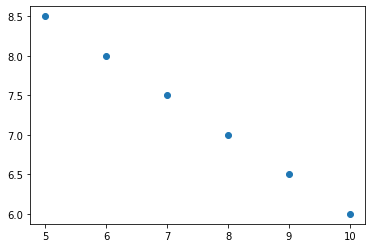

In [ ]:
%matplotlib inline
car_prices = np.array([5, 6, 7, 8, 9, 10]).astype(float)
units_sold = np.array([8.5, 8, 7.5, 7, 6.5, 6]).astype(float)

plt.scatter(car_prices, units_sold)

Se aplica el reshape de **-1 1** con el fin de poder facilitar la conversión futura hacia un tensor.

In [ ]:
car_prices_array = car_prices.reshape(-1, 1)
units_sold_array = units_sold.reshape(-1, 1)

Conversión de un array/matriz hacia un tensor.

**Nota**: units no precisa de **requires_grad_** porque es nuestro target.

In [ ]:
prices = torch.from_numpy(car_prices_array).requires_grad_(True).float()
units = torch.from_numpy(units_sold_array).float()

Creación del model.

In [ ]:
model = nn.Linear(1,1)

**Nota:** El **1 1** es el tamaño del output e input.

In [ ]:
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.015)

**Términos:**

MSELoss -> Calcula el rango de error entre la predicción y el target al momento de aplicar la norma L2.

SGD -> Stocastic Gradiente Descent.

lr -> learning rate, pasos a dar para minimizar el loss a través del gradiente.

###Training Loop

Se tiene que hacer un forward pass y un backward pass.

Se precisa de poner los **gradientes en zero** al momento de comenzar con el backward pass porque python acumula los datos y si se da eso, no vamos a obtener el resultado deseado.

tensor(4.0999e-09, grad_fn=<MseLossBackward>)


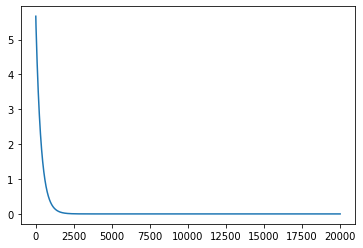

In [ ]:
losses = []
iterations = 20000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(loss)
plt.plot(range(iterations), losses)

Una vez entrenado el modelo, se predice

In [ ]:
x = torch.Tensor([[5.0]])
prediction = model(x)
print("Predicción número de unidades vendidas: ", prediction)

Predicción número de unidades vendidas:  tensor([[8.4999]], grad_fn=<AddmmBackward>)


#Regresión Logística
La regresión logística es un mecanismo eficiente para calcular probabilidades.

El resultado puede utilizarse tal cual o convertirlo a una categoría binaria, para lograr esto nos apoyamos en una función matemática llamada Sigmoide. Si en caso la clasificación tuviera más parámetros, haríamos uso de la función Softmax.

A la regresión lineal también se le agrega el sigmoide que nos dará una probabilidad de salida y con ello resolvemos nuestro problema de pasar una regresión lineal a una regresión logística y debido a este cambio el MSE ya no será mi mejor forma de calcular el LOSS. Debe cambiar.

La aproximación intuitiva es castigar cuando el valor es 0 y la predicción resulta en 1 o viceversa. Esto se logra con el logaritmo porque nos permite modelarlo perfectamente y ahora nuestra función de pérdida o LOSS va a incluir logaritmos.


*   Para problemas de probabilidad, utilizamos una regresión logística.
*   Para calcular el error(loss), nos basamos en la entropía, pero el gradiente sigue siendo útil.

####Ordenamiento de datos

In [4]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[ 5.42210458e-01, -1.42533269e+00],
       [ 6.43018707e-01, -3.20904876e+00],
       [-2.89090384e-02, -4.71594256e-01],
       [ 9.14105728e-01, -9.22265946e-01],
       [ 2.28647984e+00,  1.62738764e+00],
       [-1.52622439e+00, -3.55157588e+00],
       [ 4.23077347e+00,  2.45784770e+00],
       [ 3.42028068e+00,  9.63915054e-01],
       [ 4.06788734e+00,  1.96510996e+00],
       [ 4.00038827e+00, -2.06536045e-02],
       [ 2.14456803e+00, -3.21746128e+00],
       [-1.33554893e-01, -1.87367196e-01],
       [ 4.92458007e-02,  1.08390724e+00],
       [-1.77580385e+00, -4.89119853e-01],
       [ 2.21668165e+00, -4.64389638e+00],
       [ 1.40304941e+00,  6.62769987e+00],
       [ 1.94239071e+00,  7.68617222e-01],
       [-1.97759617e+00,  1.86234274e+00],
       [ 4.52047221e+00, -7.00127887e-01],
       [ 9.17549117e-01, -2.39338356e+00],
       [ 2.82910634e+00,  1.54722139e+00],
       [ 2.12757029e+00, -1.77802167e+00],
       [-9.81496375e-01, -4.17771236e+00],
       [-3.

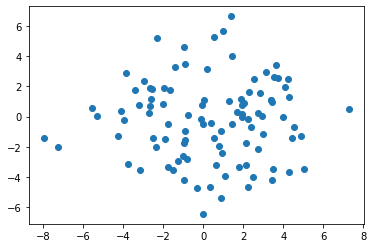

In [5]:
plt.scatter(data[:, 0], data[:, 1])

Hacer que los datos se encuentren más cercanos a los centros establecidos manualmente, en este caso, -3 y 3.

In [6]:
data[:h, :] -= 3
data[h:, :] += 3

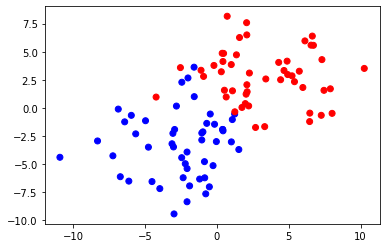

In [7]:
colors = ["blue", "red"]
color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:, 0], data[:, 1], color=color)

In [10]:
target = np.array([0]*h + [1]*h).reshape(n, 1)
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()
x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

Training Loop

*   Modelo de dos variables de entrada con una de salida.
*   **BCELoss** -> Binary Cross Entropy entre la predicción y el output.
*   Gráfica de como las iteraciones hacen que el loss se reduzca.



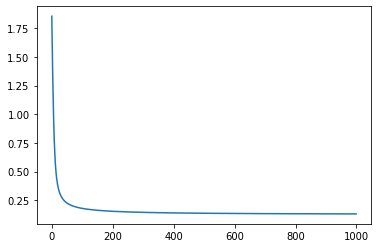

In [18]:
model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.015)
iterations = 1000

losses = []

for i in range(iterations):
  pred = model(x)
  loss = loss_function(pred, y)
  losses.append(loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(iterations), losses)

Comprobación del modelo entrenado


*   Si la predicción > 0.5 == rojo
*   Si la predicción < 0.5 == azul





In [25]:
pred_blue = torch.Tensor([[-5, -6]])
prediction_model = model(pred_blue).data[0, 0] > 0.5
print(colors[prediction_model])

pred_red = torch.Tensor([[8, 6]])
prediction_model = model(pred_red).data[0, 0] > 0.5
print(colors[prediction_model])

blue
red


Graficado de los datos con uso del sigmoide y línea en base al sigmoide.

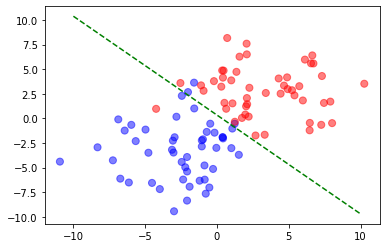

In [32]:
weight = list(model.parameters())
w0 = weight[0].data.numpy()
w1 = weight[1].data.numpy()

plt.scatter(data[:, 0], data[:, 1], c=color, s=50, alpha=0.5)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0, 0]) / w0[0, 1]

plt.plot(x_axis, y_axis, 'g--')